## Q1

XORModel(
  (linear1): Linear(in_features=2, out_features=2, bias=True)
  (activation1): Sigmoid()
  (linear2): Linear(in_features=2, out_features=1, bias=True)
)
Epoch 1000/10000, Loss = 0.2726692631840706
Epoch 2000/10000, Loss = 0.27059856429696083
Epoch 3000/10000, Loss = 0.2685358598828316
Epoch 4000/10000, Loss = 0.2639295868575573
Epoch 5000/10000, Loss = 0.22337748296558857
Epoch 6000/10000, Loss = 0.00014278387288868544
Epoch 7000/10000, Loss = 1.2648548874949483e-11
Epoch 8000/10000, Loss = 3.161915174132446e-12
Epoch 9000/10000, Loss = 3.161915174132446e-12
Epoch 10000/10000, Loss = 3.161915174132446e-12
9
Input =  tensor([0., 1.], device='cuda:0')
Output =  tensor([1.0000], device='cuda:0', grad_fn=<ViewBackward0>)


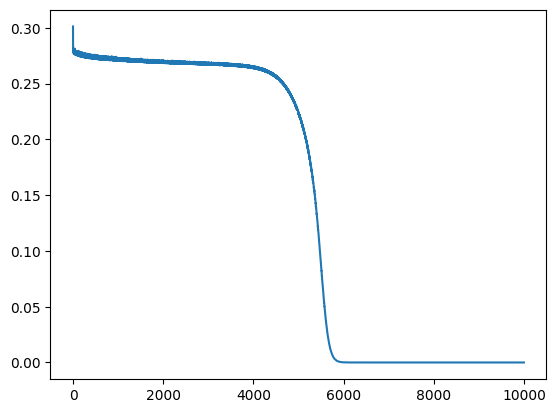

In [38]:
import torch
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import numpy as np

loss_list = []
torch.manual_seed(42)

x = torch.tensor([[0,0],[0,1],[1,0],[1,1]],dtype=torch.float32)
y = torch.tensor([0,1,1,0],dtype=torch.float32)

class XORModel(nn.Module):
    def __init__(self):
        super(XORModel,self).__init__()
        self.linear1 = nn.Linear(2,2,bias = True)
        self.activation1 = nn.Sigmoid()
        self.linear2 = nn.Linear(2,1,bias = True)
    def forward(self,x):
        x = self.linear1(x)
        x = self.activation1(x)
        x = self.linear2(x)
        return x
        
class MyDataset(Dataset):
    def __init__(self,X,Y):
        self.X = X
        self.Y = Y
    def __len__(self):
        return len(self.X)
    def __getitem__(self,idx):
        return self.X[idx].to(device),self.Y[idx].to(device)

dataset = MyDataset(x,y)
batch_size = 1
train_data_loader = DataLoader(dataset,batch_size=batch_size,shuffle=True)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = XORModel().to(device)
print(model)
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.03)

def train_one_epoch(epoch_index):
    totalloss = 0
    for i,data in enumerate(train_data_loader):
        inputs,labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs.flatten(),labels)
        loss.backward()
        optimizer.step()
        totalloss += loss.item()
    return totalloss/(len(train_data_loader)*batch_size)

EPOCHS = 10000
for epoch in range(1,EPOCHS+1):
    model.train(True)
    avg_loss = train_one_epoch(epoch)
    loss_list.append(avg_loss)
    if epoch%1000 == 0:
        print(f"Epoch {epoch}/{EPOCHS}, Loss = {avg_loss}")
        
total_params = 0
for name,param in model.named_parameters():
    params = param.numel()
    total_params += params
print(total_params)

input = torch.tensor([0.,1.]).to(device)
model.eval()
print("Input = ",input)
print("Output = ",model(input))
plt.plot(loss_list)

## Q3

In [36]:
import numpy as np

linear1w11 = -1.9767
linear1w12 = 2.0750
linear1w21 = -3.0809
linear1w22 = 3.3435
linear1b1 = 0.7012
linear1b2 = -2.5002

linear2w1 = -2.6653
linear2w2 = 2.7713
linear2b = 1.5715

x1 = 0.0
x2 = 1.0

def sigmoid(x):
    return 1/(1+np.exp(-x))

y1 = linear1w11*x1 + linear1w21*x2 + linear1b1
y2 = linear1w12*x1 + linear1w22*x2 + linear1b2

z1 = sigmoid(y1)
z2 = sigmoid(y2)

output = linear2w1*z1 + linear2w2*z2 + linear2b
print(sigmoid(output))

0.9638493619367495


## Q2

XORModel(
  (linear1): Linear(in_features=2, out_features=2, bias=True)
  (activation1): ReLU()
  (linear2): Linear(in_features=2, out_features=1, bias=True)
)
Epoch 1000/10000, Loss = 0.13272927937237
Epoch 2000/10000, Loss = 0.13223592210852075
Epoch 3000/10000, Loss = 0.13247996004338347
Epoch 4000/10000, Loss = 0.13273327170099947
Epoch 5000/10000, Loss = 0.13250787786637375
Epoch 6000/10000, Loss = 0.13288502055365825
Epoch 7000/10000, Loss = 0.13272855479851842
Epoch 8000/10000, Loss = 0.13273427388041625
Epoch 9000/10000, Loss = 0.13277523385113454
Epoch 10000/10000, Loss = 0.1328024364884186
Input =  tensor([0., 1.], device='cuda:0')
Output =  tensor([0.9926], device='cuda:0', grad_fn=<ViewBackward0>)


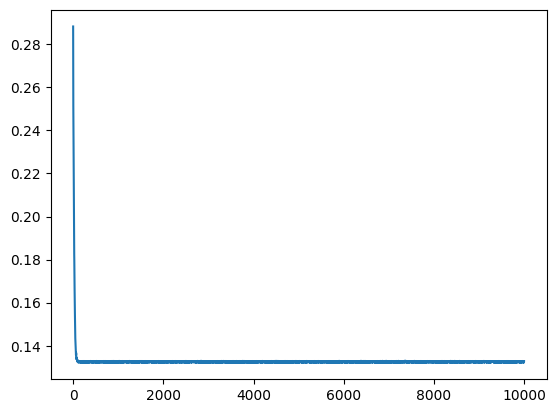

In [23]:
import torch
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import numpy as np

loss_list = []
torch.manual_seed(42)

x = torch.tensor([[0,0],[0,1],[1,0],[1,1]],dtype=torch.float32)
y = torch.tensor([0,1,1,0],dtype=torch.float32)

class XORModel(nn.Module):
    def __init__(self):
        super(XORModel,self).__init__()
        self.linear1 = nn.Linear(2,2,bias = True)
        self.activation1 = nn.ReLU()
        self.linear2 = nn.Linear(2,1,bias = True)
    def forward(self,x):
        x = self.linear1(x)
        x = self.activation1(x)
        x = self.linear2(x)
        return x
        
class MyDataset(Dataset):
    def __init__(self,X,Y):
        self.X = X
        self.Y = Y
    def __len__(self):
        return len(self.X)
    def __getitem__(self,idx):
        return self.X[idx].to(device),self.Y[idx].to(device)

dataset = MyDataset(x,y)
batch_size = 1
train_data_loader = DataLoader(dataset,batch_size=batch_size,shuffle=True)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = XORModel().to(device)
print(model)
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.03)

def train_one_epoch(epoch_index):
    totalloss = 0
    for i,data in enumerate(train_data_loader):
        inputs,labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs.flatten(),labels)
        loss.backward()
        optimizer.step()
        totalloss += loss.item()
    return totalloss/(len(train_data_loader)*batch_size)

EPOCHS = 10000
for epoch in range(1,EPOCHS+1):
    model.train(True)
    avg_loss = train_one_epoch(epoch)
    loss_list.append(avg_loss)
    if epoch%1000 == 0:
        print(f"Epoch {epoch}/{EPOCHS}, Loss = {avg_loss}")

input = torch.tensor([0.,1.]).to(device)
model.eval()
print("Input = ",input)
print("Output = ",model(input))
plt.plot(loss_list)

In [27]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transform
from torchvision.transforms import ToTensor
import torchvision.datasets as datasets
from torch.utils.data import Dataset,DataLoader

class DeepFFClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(nn.Linear(784,100,bias=True),
                                 nn.ReLU(),
                                 nn.Linear(100,100,bias=True),
                                 nn.ReLU(),
                                 nn.Linear(100,10,bias=True),
                                )
    def forward(self,x):
        x = x.view(-1, 784)
        return self.net(x)

mnist_trainset = datasets.MNIST(root="./data",download = True,train=True,transform=ToTensor())
train_loader = DataLoader(mnist_trainset,batch_size=50,shuffle=True)
mnist_testset = datasets.MNIST(root="./data",download = True,train=False,transform=ToTensor())
test_loader = DataLoader(mnist_testset,batch_size=50,shuffle=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DeepFFClassifier().to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

total_params = 0
for name,param in model.named_parameters():
    params = param.numel()
    total_params += params

for epoch in range(6):  
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 99:  
            print('[%d, %5d] loss: %.3f' %(epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

print(f"Finished Training. Final loss = {loss.item()}, Total params = {total_params}")

mat = [[0 for _ in range(10)] for _ in range(10)]

correct,total = 0,0
for i,vdata in enumerate(test_loader):
    tinputs,tlabels = vdata[0].to(device), vdata[1].to(device)
    toutputs = model(tinputs)

    _,predicted = torch.max(toutputs,1)
    total += tlabels.size(0)
    correct += (predicted==tlabels).sum()

    for i in range(len(predicted)):
        mat[predicted[i].item()][tlabels[i].item()] += 1
        
print(f"Correct = {correct}, Total = {total}")
for i in range(10):
    print(mat[i])  

[1,   100] loss: 2.290
[1,   200] loss: 2.258
[1,   300] loss: 2.205
[1,   400] loss: 2.122
[1,   500] loss: 1.962
[1,   600] loss: 1.704
[1,   700] loss: 1.391
[1,   800] loss: 1.125
[1,   900] loss: 0.936
[1,  1000] loss: 0.816
[1,  1100] loss: 0.692
[1,  1200] loss: 0.639
[2,   100] loss: 0.585
[2,   200] loss: 0.556
[2,   300] loss: 0.504
[2,   400] loss: 0.504
[2,   500] loss: 0.478
[2,   600] loss: 0.461
[2,   700] loss: 0.451
[2,   800] loss: 0.451
[2,   900] loss: 0.411
[2,  1000] loss: 0.415
[2,  1100] loss: 0.400
[2,  1200] loss: 0.395
[3,   100] loss: 0.375
[3,   200] loss: 0.375
[3,   300] loss: 0.367
[3,   400] loss: 0.369
[3,   500] loss: 0.385
[3,   600] loss: 0.377
[3,   700] loss: 0.345
[3,   800] loss: 0.355
[3,   900] loss: 0.363
[3,  1000] loss: 0.355
[3,  1100] loss: 0.334
[3,  1200] loss: 0.358
[4,   100] loss: 0.343
[4,   200] loss: 0.345
[4,   300] loss: 0.330
[4,   400] loss: 0.331
[4,   500] loss: 0.313
[4,   600] loss: 0.327
[4,   700] loss: 0.302
[4,   800] 

In [28]:
for i in range(10):
    print(mat[i]) 

[960, 0, 13, 2, 2, 8, 15, 4, 7, 10]
[0, 1108, 8, 1, 2, 3, 3, 9, 4, 6]
[2, 3, 920, 19, 4, 3, 6, 26, 5, 1]
[1, 2, 11, 911, 0, 28, 0, 4, 13, 8]
[0, 0, 9, 0, 899, 4, 10, 6, 8, 22]
[4, 1, 2, 34, 0, 800, 15, 0, 24, 10]
[7, 3, 12, 1, 13, 12, 905, 0, 11, 0]
[2, 2, 13, 14, 2, 4, 1, 945, 5, 13]
[4, 16, 39, 19, 6, 22, 3, 4, 887, 7]
[0, 0, 5, 9, 54, 8, 0, 30, 10, 932]
